# Домашня робота №9

# Незалежність та некорельованість
На цьому занятті ми розглянемо випадкові вектори, складені з випадкових величин із розглянутих раніше розподілів, які реалізовані в бібліотеці [SciPy](https://docs.scipy.org/doc/scipy/reference/).
Із цього пакету будемо використовувати клас [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html), в якому реалізована велика кількість імовірнісних розподілів і статистичних функцій.

Для візуалізації використаємо бібліотеку [Matplotlib](https://matplotlib.org/).

In [19]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Класи для 3D графіків

In [28]:
# Class that anables 3D plotting
from mpl_toolkits.mplot3d import Axes3D

# Class of color maps
from matplotlib import cm

# This line makes 3D plots in Jupyter Notebook interactive (uncomment to anable)
%matplotlib notebook
%matplotlib inline

## 2 Багатовимірний нормальний розподіл

Випадкова величина $\zeta$ має $k$-вимірний нормальний розподіл з вектором середніх $\mu$ та матрицею коваріацій $\Sigma$,
тобто $\zeta \sim N_k(\mu, \Sigma)$,
якщо її щільність дорівнює:
$$f(x) = \frac{1}{\sqrt{(2 \pi)^k \det \Sigma}} \exp \left\{ -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right\}.$$

Детальна інформація про клас `multivariate_normal` в [документації](https://docs.scipy.org/doc/scipy-1.2.1/reference/generated/scipy.stats.multivariate_normal.html).

In [21]:
from scipy.stats import multivariate_normal

### 2.1 Зміна матриці коваріацій

#### 2.1.1 Завдання 2.1.1

Зобразіть графік поверхні та контурний графік функції щільності $2$-вимірного нормального розподілу з параметрами
$$\mu = \begin{bmatrix} 0 \\ 0\end{bmatrix}, \qquad
\Sigma = \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix}.$$

<IPython.core.display.Javascript object>


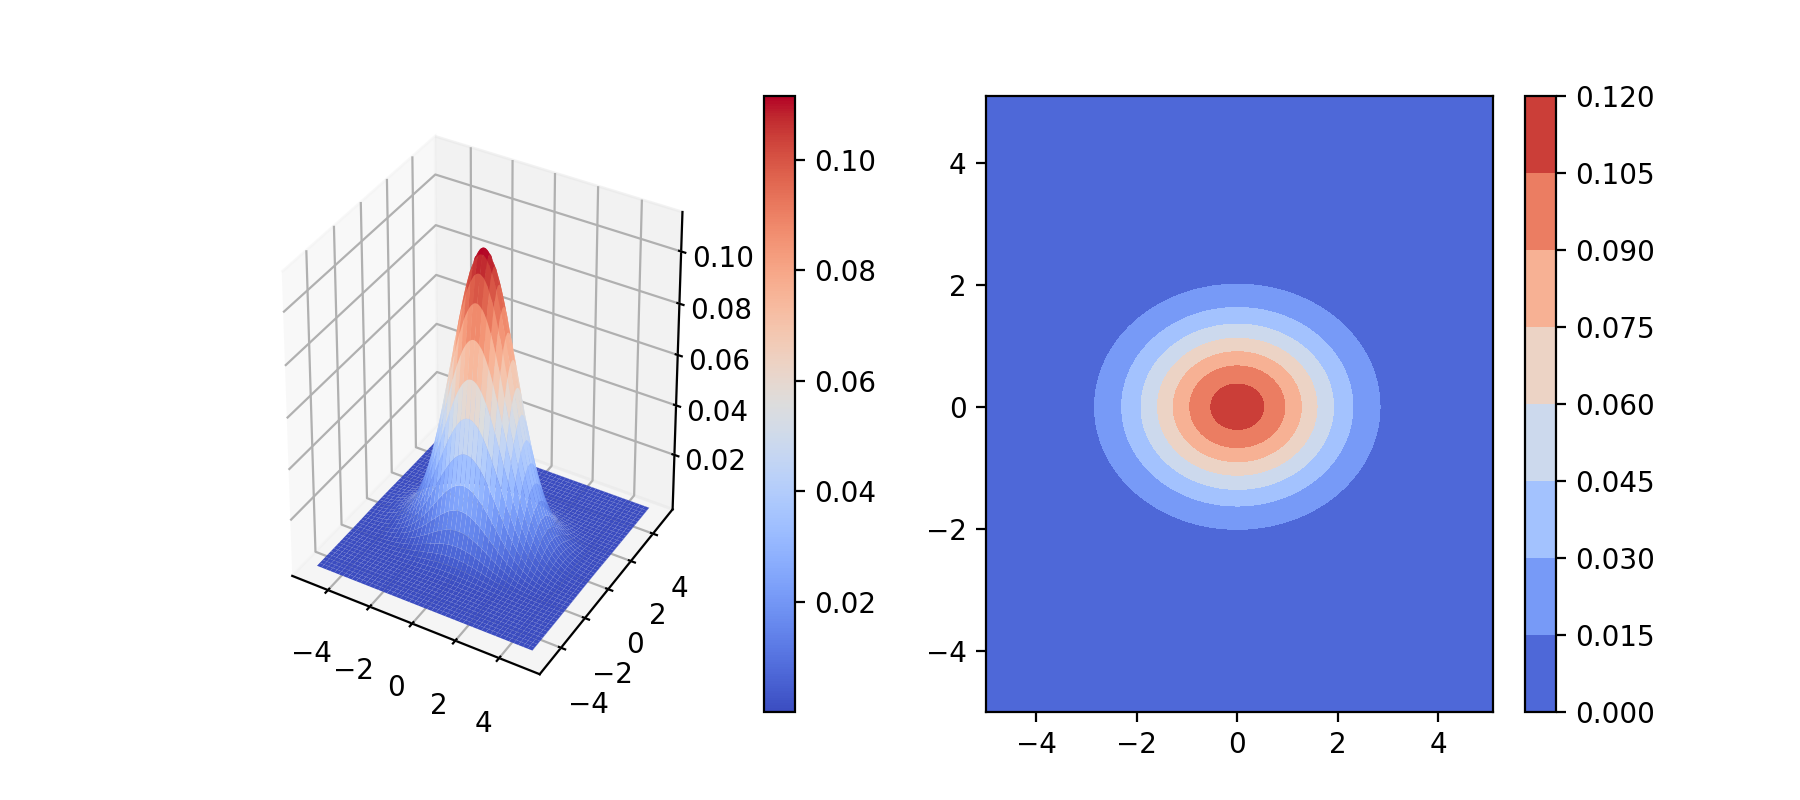

In [22]:
mu = [0, 0]
sig = [[2, 0], [0, 1]]

xi = multivariate_normal(mean=mu, cov=sig)

x = np.arange(-5, 5.1, 0.01)
y = np.arange(-5, 5.1, 0.01)

xx, yy = np.meshgrid(x, y)
pos = np.dstack((xx, yy))
z = xi.pdf(pos)

fig = plt.figure(figsize=(9, 4))

ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(xx, yy, z, cmap=cm.coolwarm)
fig.colorbar(surf)

ax2 = fig.add_subplot(122)
cont = ax2.contourf(xx, yy, z, cmap=cm.coolwarm)
fig.colorbar(cont)

plt.show()


#### 2.1.2 Завдання 2.1.2

Зобразіть графік поверхні та контурний графік функції щільності $2$-вимірного нормального розподілу з параметрами
$$\mu = \begin{bmatrix} 1 \\ -1\end{bmatrix}, \qquad
\Sigma = \begin{bmatrix} 2 & -0.5 \\ -0.5 & 1 \end{bmatrix}.$$

<IPython.core.display.Javascript object>


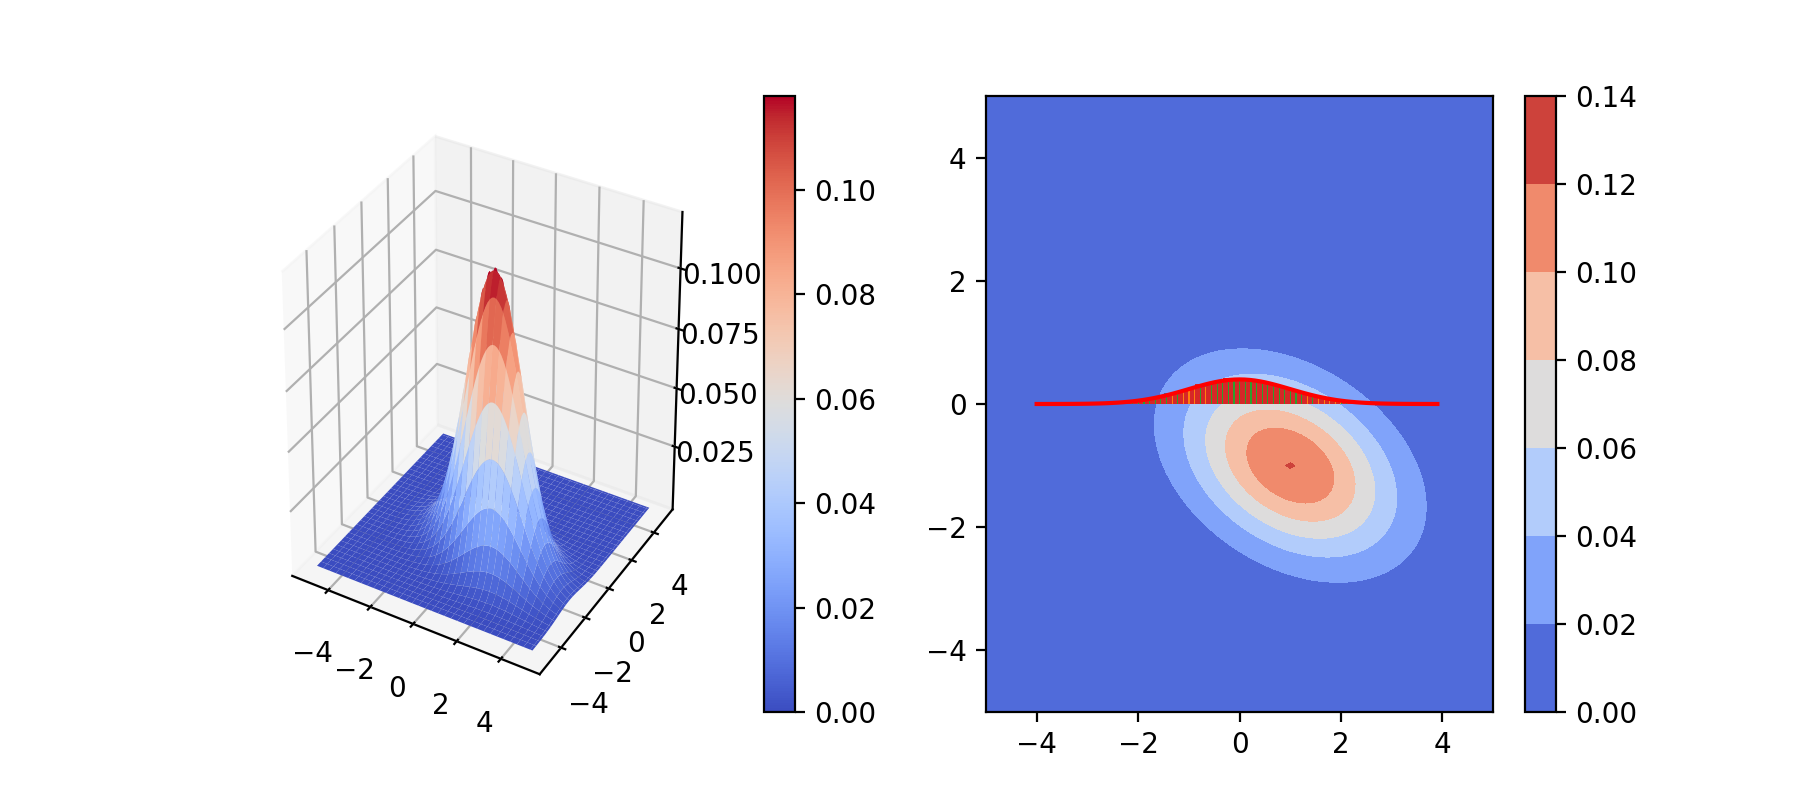

In [23]:
mu = [1, -1]
sig = [[2, -0.5], [-0.5, 1]]

xi = multivariate_normal(mean=mu, cov=sig)

x = np.arange(-5, 5.1, 0.1)
y = np.arange(-5, 5.1, 0.1)

xx, yy = np.meshgrid(x, y)
pos = np.dstack((xx, yy))
z = xi.pdf(pos)

fig = plt.figure(figsize=(9, 4))

ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(xx, yy, z, cmap=cm.coolwarm)
fig.colorbar(surf)

ax2 = fig.add_subplot(122)
cont = ax2.contourf(xx, yy, z, cmap=cm.coolwarm)
fig.colorbar(cont)

plt.show()

## 3 Некорельованість не означає незалежність

### 3.1 Задача 1.16.13

Нехай $Z = X Y$, де $X \sim N(0, 1)$ не залежить від $Y$ і $P(Y = 1) = P(Y = -1) = \frac{1}{2}$.
Покажіть, що $Z \sim N(0, 1)$ і що $X$ та $Z$ некорельовані, але залежні.
Знайдіть розподіл пар $(X, Z)$ та $(Y, Z)$, а також розподіл $X + Z$.

1. Згенеруйте $n = 100000$ значень випадкових величин $X, Y$;
2. Отримайте $n = 100000$ значень випадкової величини $Z$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $Z$;
   - функцію щільності випадкової величини $Z$.
4. Виведіть матрицю коваріацій між значеннями випадкових величин $X$ та $Z$.
5. Для значень $X$ та $Z$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Для значень $Y$ та $Z$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
7. Зобразіть на графіку:
   - нормовану гістограму $n = 100000$ значень випадкової величини $X+Z$;
   - функцію щільності випадкової величини $X+Z$.

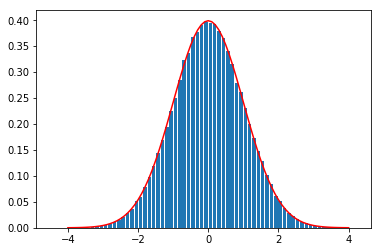

Matrix of covariance of random variables
 [[ 1.00485761 -0.00255417]
 [-0.00255417  1.00479531]]


In [108]:
#1-4
#Z ~ N(0, 1) -> f_z = x.pdf()

from scipy.stats import norm
from numpy.random import choice

X = norm()
x_rv = X.rvs(size=N)
Y = (-1, 1)
y_rv = choice(Y, size=n)
N = 100000
z_rv = x_rv * y_rv
x = np.arange(-4, 4.1, 0.1)

plt.hist(z_rv, density=True, rwidth=0.8, bins=70)
plt.plot(x, X.pdf(x), 'r')

plt.show()

print('Matrix of covariance of random variables\n',np.cov(x_rv, z_rv))

In [119]:
def bar3d(x, y, x_range, y_range, n_bins, title):
    
    fig = plt.figure(figsize=(35,10))
    ax1 = fig.add_subplot(131, projection='3d')
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_zlabel("z")
    ax1.set_title("3D histogram for " + title)
    ax2 = fig.add_subplot(132)
    ax2.set_title("Contour plot for " + title)
    ax3 = fig.add_subplot(133)
    ax3.set_title("Scatter plot for " + title)
    hist, xedges, yedges = np.histogram2d(x, y, bins=n_bins, range=[x_range, y_range])
    
    # Construct arrays for the anchor positions of the bars.
    xpos1, ypos1 = np.meshgrid(xedges[:-1] + 0.125, yedges[:-1] + 0.125, indexing="ij")
    xpos = xpos1.ravel()
    ypos = ypos1.ravel()
    zpos = 0    

    # Construct arrays with the dimensions for the bars.
    dx = dy = 0.2 * np.ones_like(zpos)
    dz = hist.ravel()
    x_length = (x_range[1] - x_range[0]) / n_bins
    y_length = (y_range[1] - y_range[0]) / n_bins
    dz_normed = dz / (n * x_length * y_length)

    # Make color map with 8 colors
    colors = cm.get_cmap('viridis', 8)

    # Plot 3D histogram
    ax1.bar3d(xpos, ypos, zpos, dx, dy, dz_normed, color=colors(dz_normed / dz_normed.max()), zsort='average')

    # Add color bar
    colourMap = plt.cm.ScalarMappable(cmap=colors)
    colourMap.set_array(dz_normed)
    colBar = plt.colorbar(colourMap)

    # Make contour plot
    normed_hist = hist / (N * x_length * y_length)
    ax2.contourf(xpos1, ypos1, normed_hist, cmap=colors)
    
    ax3.plot(x, y, 'o', markersize=1)
    plt.show()

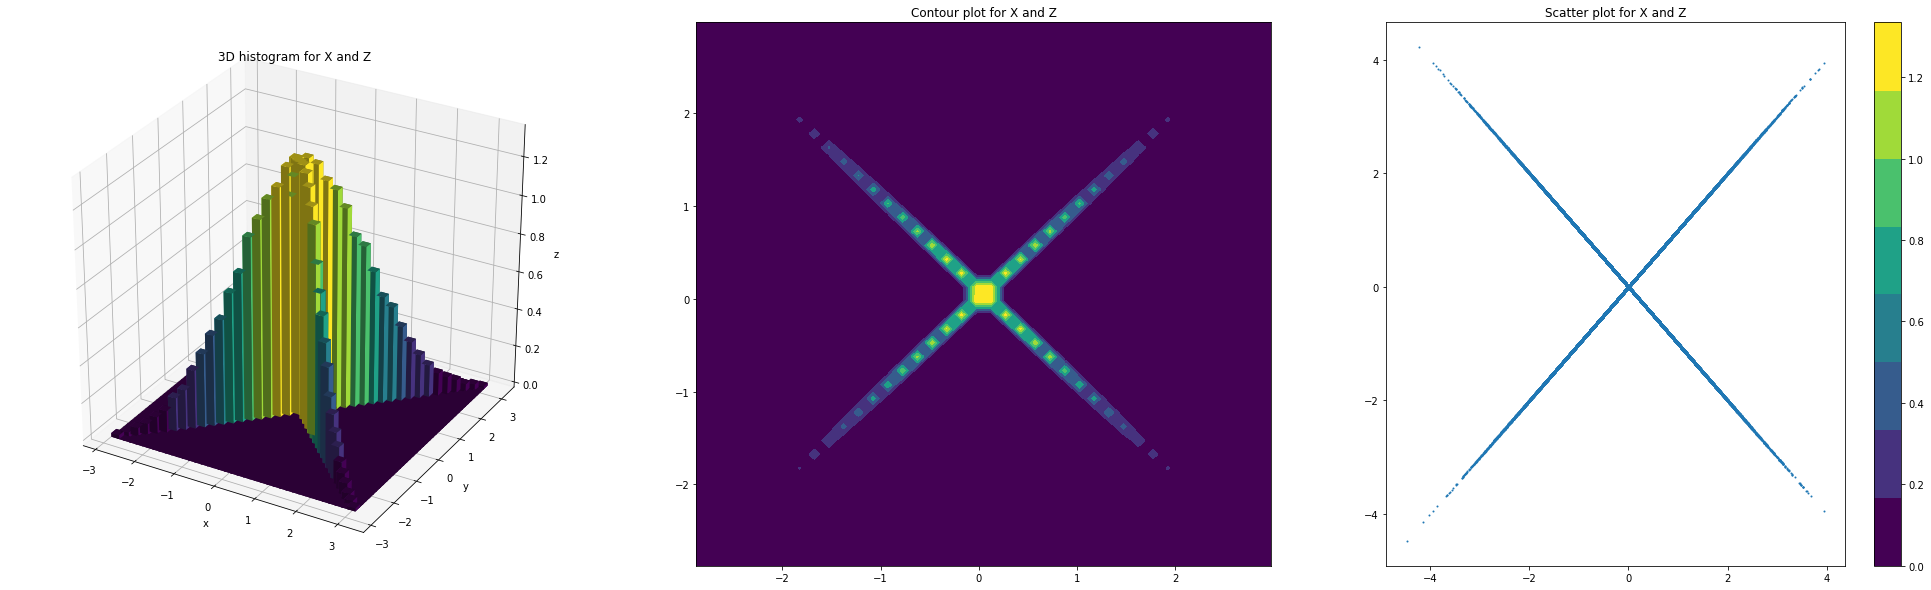

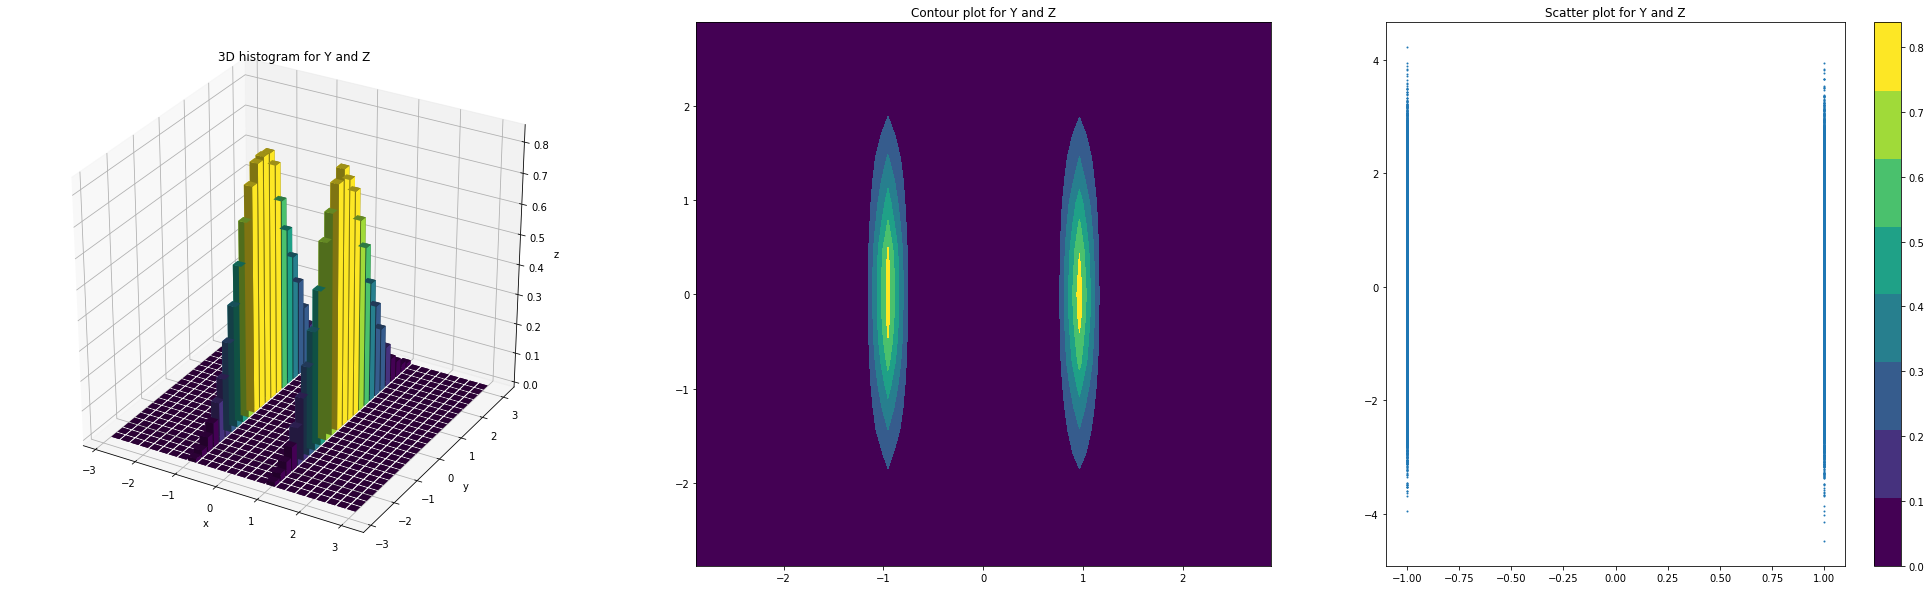

In [120]:
bar3d(x_rv, z_rv, [-3, 3], [-3, 3], 40, "X and Z")

bar3d(y_rv, z_rv, [-3, 3], [-3, 3], 25, "Y and Z")

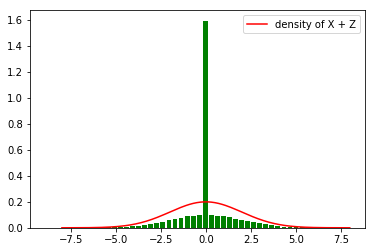

In [121]:
rvs = x_rv + z_rv
x = np.arange(-8, 8.1, 0.1)
rez = norm(0, 2)

plt.hist(rvs, density=True, color='g', rwidth=0.8, bins=50)
plt.plot(x, rez.pdf(x), 'r', label="density of X + Z")
plt.legend()

plt.show()

## 4 Незалежність випадкових величин з Домашньої роботи №8

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного рівномірного розподілу.
Тобто $\xi_1, \xi_2 \sim Exp(1)$.

Тоді випадкові величини
$$
\begin{aligned}
\zeta_1 &= \frac{\xi_1}{\xi_1 + \xi_2} \sim Uniform(0, 1), \\
\zeta_2 &= \xi_1 + \xi_2 \sim \Gamma(2)
\end{aligned}
$$
незалежні.
1. Згенеруйте $n = 100000$ значень випадкових величин $\xi_1, \xi_2$;
2. Отримайте $n = 100000$ значень випадкових величин $\zeta_1, \zeta_2$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_1$;
   - функцію щільності випадкової величини $\zeta_1$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_2$;
   - функцію щільності випадкової величини $\zeta_2$.
5. Для значень двох незалежних випадкових величин $\eta_1 \sim Uniform(0, 1), \eta_2 \sim \Gamma(2)$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Для значень $\zeta_1$ та $\zeta_2$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
7. Виведіть матрицю коваріацій, кореляції Пірсона та Спірмена між значеннями випадкових величин $\zeta_1$ та $\zeta_2$.

Pearson's correlation coefficient: 0.00026266494235984263
Stearmanr correlation coefficient: -0.0020251452093345145


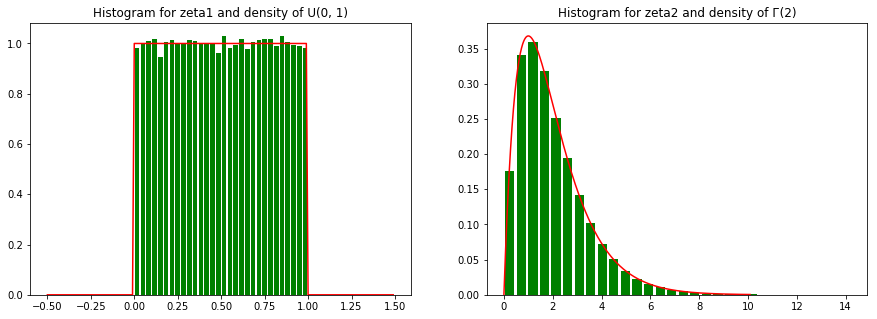

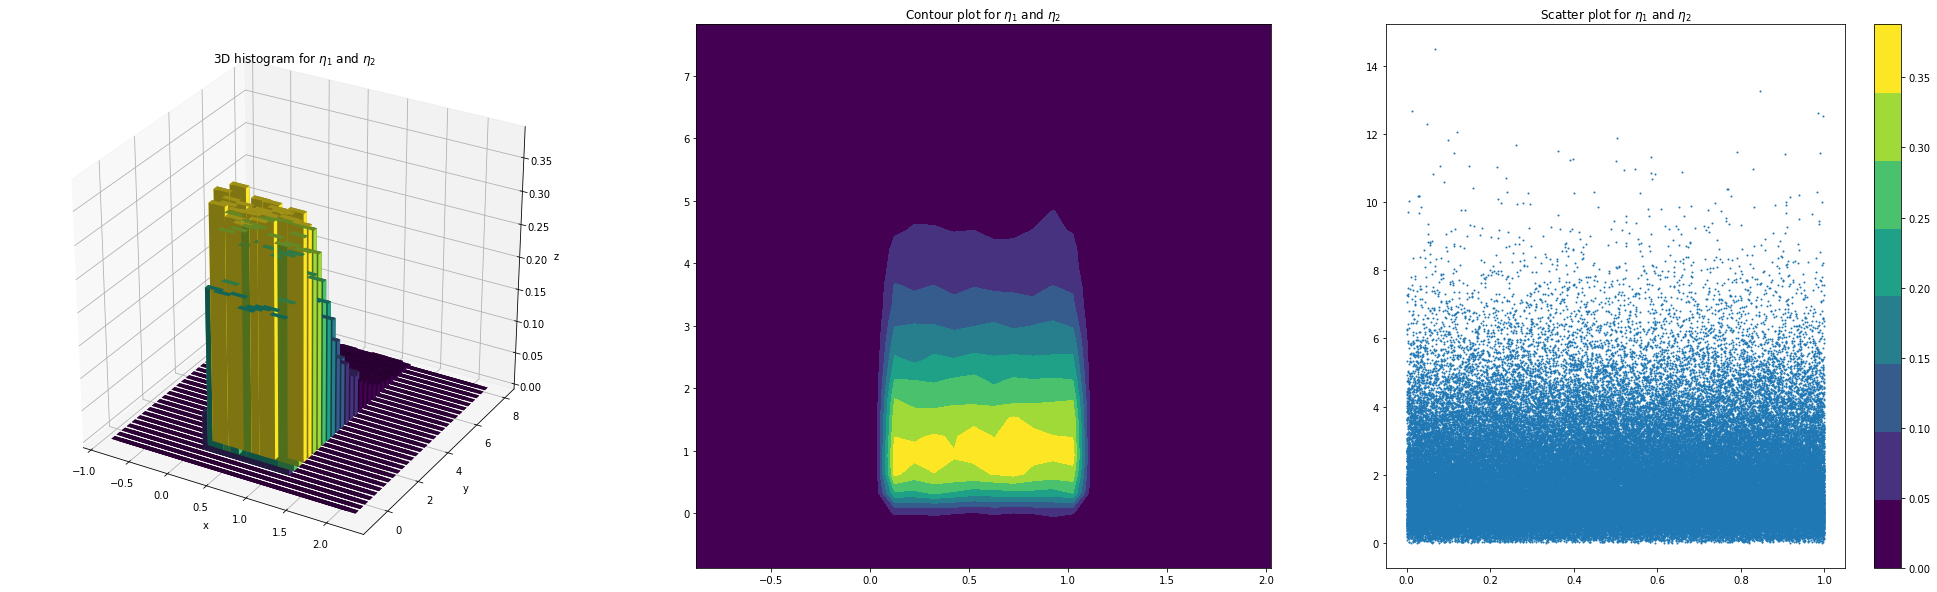

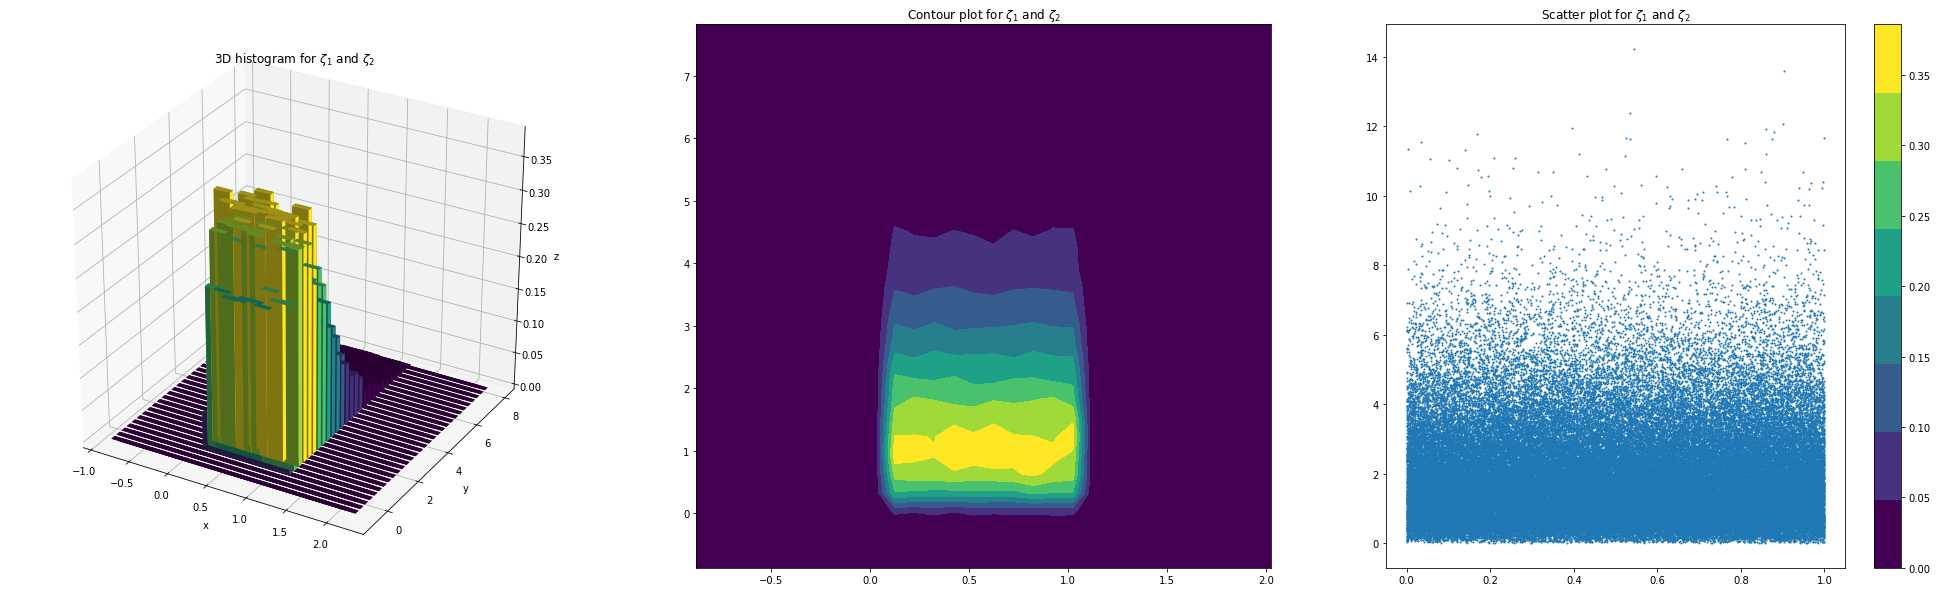

Covariation matrix
[[8.31246736e-02 1.06675589e-04]
 [1.06675589e-04 1.98424785e+00]]
Pearson coef
(0.00026266494235984263, masked_array(data=0.93380311,
             mask=False,
       fill_value=1e+20))
Spearman coef
SpearmanrResult(correlation=-0.0020251452093345145, pvalue=0.5219127148860065)


In [129]:
from scipy.stats import expon, gamma, beta, uniform
from scipy.stats.mstats import pearsonr, spearmanr

N = 100000
xi1 = expon(0, 1)
xi2 = expon(0, 1)

xi1_rvs = xi1.rvs(size=N)      
xi2_rvs = xi2.rvs(size=N)

zeta1 = xi1_rvs / (xi1_rvs + xi2_rvs)
zeta2 = xi1_rvs + xi2_rvs

x1 = np.arange(-0.5, 1.5, 0.01)
x2 = np.arange(0, 10.1, 0.01)

eta1 = uniform.rvs(0, 1, size=n)
eta2 = gamma.rvs(a=2, loc=0, scale=1, size=n)

print("Pearson's correlation coefficient:", pearsonr(zeta1, zeta2)[0])
print("Stearmanr correlation coefficient:", spearmanr(zeta1, zeta2)[0])


fig = plt.figure(figsize=(20,9))
fig.set_size_inches(15, 5)
plt.subplots_adjust(hspace=0.4)

plt.subplot(1, 2, 1)
plt.hist(zeta1, density=True, color='g', rwidth=0.8, bins=30)
plt.plot(x1, uniform.pdf(x1, loc=0, scale=1), 'r') 
plt.title("Histogram for zeta1 and density of U(0, 1)")

plt.subplot(1, 2, 2)
plt.hist(zeta2, density=True, color='g', rwidth=0.8, bins=30)
plt.plot(x2, gamma.pdf(x2, 2, loc=0, scale=1), 'r')
plt.title("Histogram for zeta2 and density of Г(2)")

bar3d(eta1, eta2, [-1, 2], [-1, 8], 30, "$\eta_1$ and $\eta_2$")
bar3d(zeta1, zeta2, [-1, 2], [-1, 8], 30, "$\zeta_1$ and $\zeta_2$")

plt.show()

print("Covariation matrix")
print(np.cov(zeta1, zeta2))
print("Pearson coef")
print(pearsonr(zeta1, zeta2))
print("Spearman coef")
print(spearmanr(zeta1, zeta2))

## 5 Генерування залежних випадкових величин

### 5.1 Нормальний розподіл

Нехай $\zeta = (\zeta_1, \zeta_2)^T \sim N_2(\textbf{0}, I)$, тобто $\zeta_1, \zeta_2 \sim N(0, 1)$ &mdash; незалежні,
$A$ &mdash; матриця $2 \times 2$, $m$ &mdash; вектор $2 \times 1$.
Тоді
$$A \zeta + m \sim N_2 (m, A A^T).$$

#### 5.1.1 Від'ємна кореляція

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного нормального розподілу.
Тобто $\xi_1, \xi_2 \sim N(0, 1)$.

Згенеруйте випадковий вектор $\zeta = (\zeta_1, \zeta_2)$ з $2$-вимірного нормального розподілу з параметрами
$$
\mu = \begin{bmatrix} 1 \\ -1 \end{bmatrix}, \qquad
\Sigma = \begin{bmatrix} 2 & -0.5 \\ -0.5 & 1 \end{bmatrix}
$$
за допомогою лінійного перетворення випадкових величин $\xi_1, \xi_2$ та розкладу Холецького матриці $\Sigma$.

1. Згенеруйте $n = 100000$ значень випадкових величин $\xi_1, \xi_2 \sim N(0,1)$;
2. Отримайте $n = 100000$ значень $\zeta$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_1$;
   - функцію щільності випадкової величини $\xi_1$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_2$;
   - функцію щільності випадкової величини $\xi_2$.
5. Для значень $\zeta_1$ та $\zeta_2$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Виведіть матрицю коваріацій, кореляції Пірсона та Спірмена між значеннями випадкових величин $\zeta_1$ та $\zeta_2$.
7. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_1$;
   - функцію щільності випадкової величини $\zeta_1$.
8. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_2$;
   - функцію щільності випадкової величини $\zeta_2$.

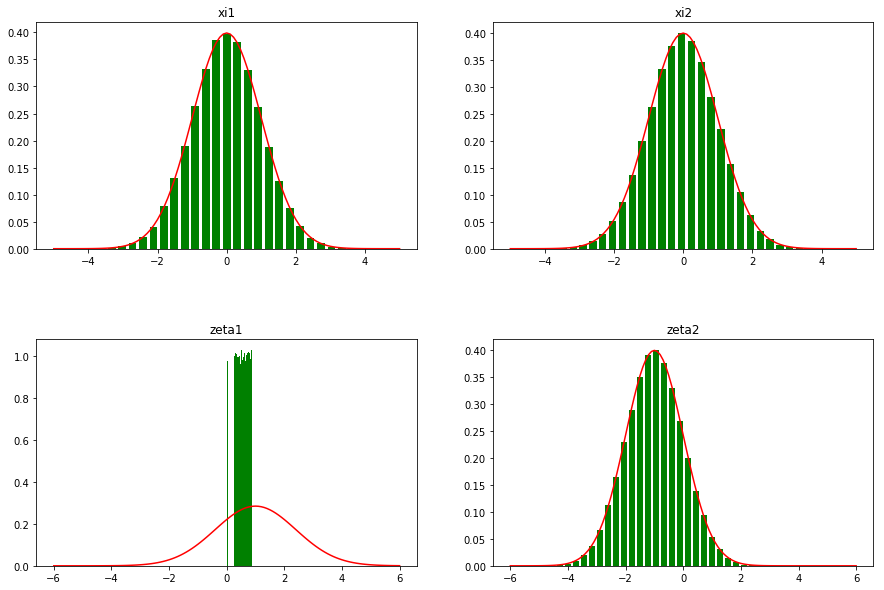

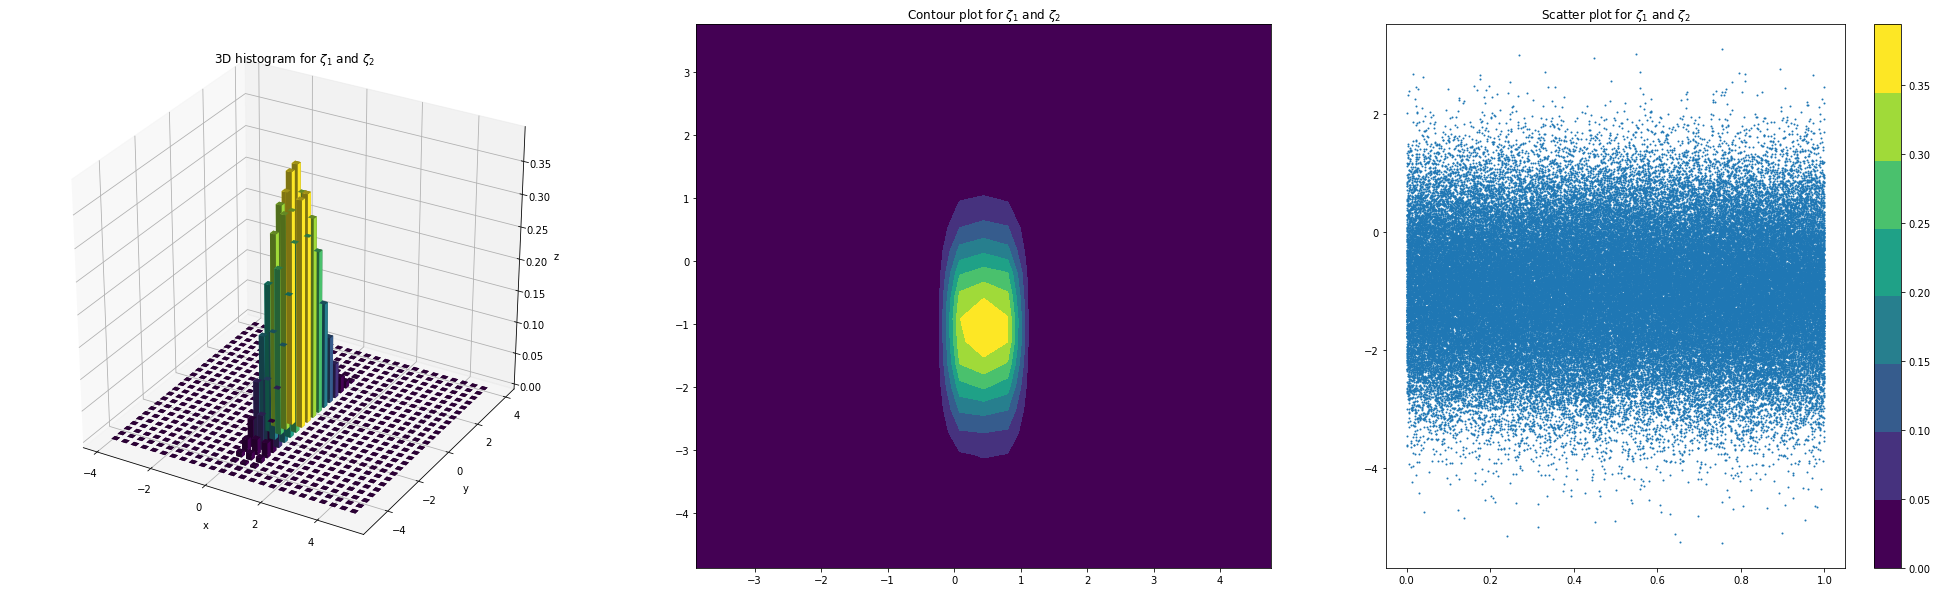

Covariation matrix
[[ 8.31246736e-02 -6.27725642e-04]
 [-6.27725642e-04  1.00153782e+00]]
Pearson coef
(-0.002175560750451527, masked_array(data=0.49147487,
             mask=False,
       fill_value=1e+20))
Spearman coef
SpearmanrResult(correlation=-0.0002637685788983769, pvalue=0.9335256111115107)


In [142]:
mu = [1, -1]
sig = [[2, -0.5],[-0.5, 1]]

A = np.linalg.cholesky(np.array(sig))

xi1_rvs = norm(0, 1).rvs(size=n)
xi2_rvs = norm(0, 1).rvs(size=n)
x1 = np.arange(-5, 5.1, 0.1)

zeta = np.array([A.dot(np.array([a, b])) + mu for a, b in zip(xi1_rvs, xi2_rvs)])
zeta2 = np.array([a[1] for a in zeta])


fig = plt.figure(figsize=(15,9))
fig.set_size_inches(15, 10)
plt.subplots_adjust(hspace=0.4)

plt.subplot(2, 2, 1)
plt.hist(xi1_rvs, density=True, color='g', rwidth=0.75, bins=30)
plt.plot(x1, norm.pdf(x1), 'r')
plt.title("xi1")

plt.subplot(2, 2, 2)
plt.hist(xi2_rvs, density=True, color='g', rwidth=0.75, bins=30)
plt.plot(x1, norm(0, 1).pdf(x1), 'r')
plt.title("xi2")


x = np.arange(-6, 6.1, 0.1)

plt.subplot(2, 2, 3)
plt.hist(zeta1, density=True, color='g', rwidth=0.75, bins=30)
plt.plot(x, norm.pdf(x, 1, 1.4), 'r')
plt.title("zeta1")

plt.subplot(2, 2, 4)
plt.hist(zeta2, density=True, color='g', rwidth=0.75, bins=30)
plt.plot(x, norm.pdf(x, -1, 1), 'r')
plt.title("zeta2")

plt.show()

bar3d(zeta1, zeta2, [-4, 5], [-5, 4], 25, '$\zeta_1$ and $\zeta_2$')

print("Covariation matrix")
print(np.cov(zeta1, zeta2))
print("Pearson coef")
print(pearsonr(zeta1, zeta2))
print("Spearman coef")
print(spearmanr(zeta1, zeta2))

### 5.2 Експоненційний розподіл

За метеріалами статті

*A. J. Lawrance, P. A. W. Lewis.
“Simple Dependent Pairs of Exponential and Uniform Random Variables.”
Operations Research, vol. 31, no. 6, 1983, pp. 1179–1197.*

Оригінал статті дивіться в прикріпленому файлі [lab_9_paper.pdf](https://github.com/Slavastas119/Probability-Theory-2-year-students/blob/master/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B5%20%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D1%82%D1%8F%209/lab_9_paper.pdf)
або [за посиланням](https://pdfs.semanticscholar.org/1ceb/fbbe20644a4e9d3a6eaa3698777a8b0169a6.pdf).

#### 5.2.1 Від'ємна кореляція

Розглянемо дві незалежні випадкові величини $u_1, u_2$ зі стандартного рівномірного розподілу
та незалежні від них, але залежні між собою, випадкові величини $\eta_1, \eta_2$ з розподілу Бернуллі з параметром $p$.
Тобто $u_1, u_2 \sim Uniform(0, 1), \eta_1, \eta_2 \sim Bernoulli(p)$.

Тоді
$$
\begin{aligned}
\xi_1 &= F^{-1}(u_1) \sim Exp(1), \\
\xi_2 &= F^{-1}(u_2) \sim Exp(1), \\
\xi_1^a &= F^{-1}(1-u_1) \sim Exp(1), \\
\xi_2^a &= F^{-1}(1-u_2) \sim Exp(1),
\end{aligned}
$$
де $F$ &mdash; функція розподілу стандартного експоненційного розподілу.

Випадкові величини $\eta_1, \eta_2$ залежні таким чином:
$$
\left\{
\begin{aligned}
P(\eta_1 = 0, \eta_2 = 0) &= 0, \\
P(\eta_1 = 0, \eta_2 = 1) &= 1 - p, \\
P(\eta_1 = 1, \eta_2 = 0) &= 1 - p, \\
P(\eta_1 = 1, \eta_2 = 1) &= 2 p - 1,
\end{aligned}
\right.
\quad p \geq 1/2, \qquad \qquad
\left\{
\begin{aligned}
P(\eta_1 = 0, \eta_2 = 0) &= 1 - 2 p, \\
P(\eta_1 = 0, \eta_2 = 1) &= p, \\
P(\eta_1 = 1, \eta_2 = 0) &= p, \\
P(\eta_1 = 1, \eta_2 = 1) &= 0,
\end{aligned}
\right.
\quad p \leq 1/2.
$$

Тоді випадкові величини
$$
\begin{aligned}
\zeta_1 &= (1 - p) \xi_1 + \eta_1 \xi_2 \sim Exp(1), \\
\zeta_2 &= (1 - p) \xi_2^a + \eta_2 \xi_1^a \sim Exp(1)
\end{aligned}
$$
залежні та мають коефіцієнт кореляції
$$
Corr(\zeta_1, \zeta_2) =
\left\{
\begin{aligned}
&2 p (1 - p)(-0.6449) - (1 - p)^2, & p \geq 1/2, \\
&2 p (1 - p)(-0.6449) - p^2, & p \leq 1/2.
\end{aligned}
\right.
$$

Для параметра $p = 0.5$
1. Згенеруйте $n = 100000$ значень випадкових величин $u_1, u_2, \eta_1, \eta_2$;
2. Отримайте $n = 100000$ значень $\xi_1, \xi_2, \xi_1^a, \xi_2^a, \zeta_1, \zeta_2$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_1$;
   - функцію щільності випадкової величини $\xi_1$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_2$;
   - функцію щільності випадкової величини $\xi_2$.
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_1^a$;
   - функцію щільності випадкової величини $\xi_1^a$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_2^a$;
   - функцію щільності випадкової величини $\xi_2^a$.
5. Для значень $\zeta_1$ та $\zeta_2$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Виведіть теоретичну кореляцію, матрицю коваріацій, кореляції Пірсона та Спірмена між значеннями випадкових величин $\zeta_1$ та $\zeta_2$.
7. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_1$;
   - функцію щільності випадкової величини $\zeta_1$.
8. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_2$;
   - функцію щільності випадкової величини $\zeta_2$.

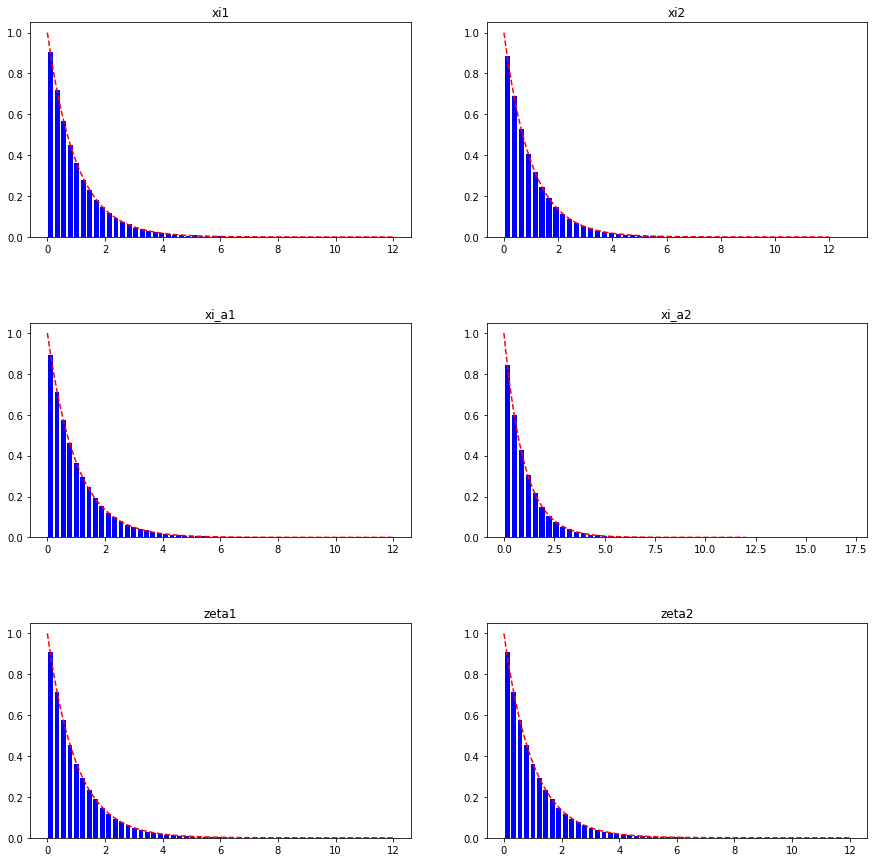

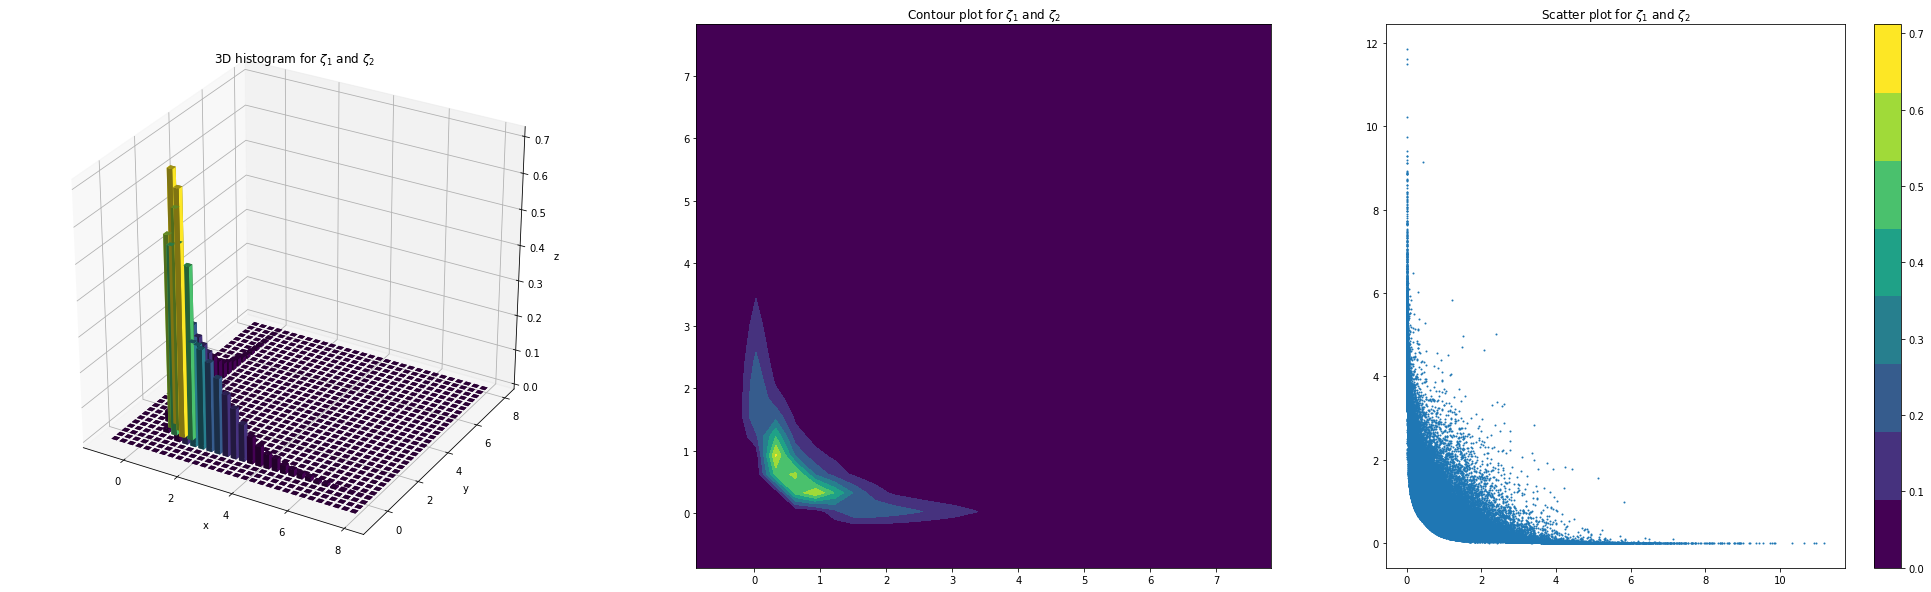

Theoretical correlation
-0.57245
Covariation matrix
[[ 1.00176263 -0.57350196]
 [-0.57350196  1.0114122 ]]
Pearson coef
(-0.5697553367823153, masked_array(data=0.,
             mask=False,
       fill_value=1e+20))
Spearman coef
SpearmanrResult(correlation=-0.8662885616401809, pvalue=0.0)


In [151]:
from scipy.stats import bernoulli

p = 0.5

u1 = uniform.rvs(0, 1, size=n)
u2 = uniform.rvs(0, 1, size=n)

eta_values = ['00', '01', '10', '11']
probs = [0, 1-p, 1-p, 2*p-1] if p >= 0.5 else [1 - 2*p, p, p, 0]
eta = np.random.choice(eta_values, size=n, p=probs)
eta1 = np.array([int(a[0]) for a in eta])
eta2 = np.array([int(a[1]) for a in eta])

xi1 = expon.ppf(u1)
xi2 = expon.ppf(u2)

xi_a1 = expon.ppf(1 - u1)
xi_a2 = expon.ppf(1 - u2)


zeta1 = (1 - p) * xi1 + eta1 * xi2
zeta2 = (1 - p) * xi_a2 + eta2 * xi_a1

x = np.arange(0, 12.1, 0.1)

fig = plt.figure(figsize=(20,15))
fig.set_size_inches(15, 15)
plt.subplots_adjust(hspace=0.4)

plt.subplot(3, 2, 1)
plt.hist(xi1, density=True, color='b', rwidth=0.75, bins=50)
plt.plot(x, expon.pdf(x), 'r--')
plt.title('xi1')

plt.subplot(3, 2, 2)
plt.hist(xi2, density=True, color='b', rwidth=0.75, bins=50)
plt.plot(x, expon.pdf(x), 'r--')
plt.title('xi2')

plt.subplot(3, 2, 3)
plt.hist(xi_a1, density=True, color='b', rwidth=0.75, bins=50)
plt.plot(x, expon.pdf(x), 'r--')
plt.title('xi_a1')

plt.subplot(3, 2, 4)
plt.hist(xi_a2, density=True, color='b', rwidth=0.75, bins=50)
plt.plot(x, expon.pdf(x), 'r--')
plt.title('xi_a2')

plt.subplot(3, 2, 5)
plt.hist(zeta1, density=True, color='b', rwidth=0.75, bins=50)
plt.plot(x, expon.pdf(x), 'r--')
plt.title('zeta1')

plt.subplot(3, 2, 6)
plt.hist(zeta1, density=True, color='b', rwidth=0.75, bins=50)
plt.plot(x, expon.pdf(x), 'r--')
plt.title('zeta2')

plt.show()

bar3d(zeta1, zeta2, [-1, 8], [-1, 8], 30, "$\zeta_1$ and $\zeta_2$")

corr = 2*p*(1 - p)*(-0.6449) - (1 - p)**2 if p >= 0.5 else 2*p*(1 - p)*(-0.6449) - p**2
print("Theoretical correlation")
print(corr)
print("Covariation matrix")
print(np.cov(zeta1, zeta2))
print("Pearson coef")
print(pearsonr(zeta1, zeta2))
print("Spearman coef")
print(spearmanr(zeta1, zeta2))

### 5.3 Рівномірний розподіл

За метеріалами статті

*A. J. Lawrance, P. A. W. Lewis.
“Simple Dependent Pairs of Exponential and Uniform Random Variables.”
Operations Research, vol. 31, no. 6, 1983, pp. 1179–1197.*

Оригінал статті дивіться в прикріпленому файлі [lab_9_paper.pdf](https://github.com/Slavastas119/Probability-Theory-2-year-students/blob/master/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B5%20%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D1%82%D1%8F%209/lab_9_paper.pdf)
або [за посиланням](https://pdfs.semanticscholar.org/1ceb/fbbe20644a4e9d3a6eaa3698777a8b0169a6.pdf).

#### 5.3.1 Від'ємна кореляція

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного рівномірного розподілу
та незалежні від них, але залежні між собою, випадкові величини $\eta_1, \eta_2$ з розподілу Бернуллі з параметром $p$.
Тобто $\xi_1, \xi_2 \sim Uniform(0, 1), \eta_1, \eta_2 \sim Bernoulli(p)$.

Випадкові величини $\eta_1, \eta_2$ залежні таким чином:
$$
\left\{
\begin{aligned}
P(\eta_1 = 0, \eta_2 = 0) &= 0, \\
P(\eta_1 = 0, \eta_2 = 1) &= 1 - p, \\
P(\eta_1 = 1, \eta_2 = 0) &= 1 - p, \\
P(\eta_1 = 1, \eta_2 = 1) &= 2 p - 1,
\end{aligned}
\right.
\quad p \geq 1/2, \qquad \qquad
\left\{
\begin{aligned}
P(\eta_1 = 0, \eta_2 = 0) &= 1 - 2 p, \\
P(\eta_1 = 0, \eta_2 = 1) &= p, \\
P(\eta_1 = 1, \eta_2 = 0) &= p, \\
P(\eta_1 = 1, \eta_2 = 1) &= 0,
\end{aligned}
\right.
\quad p \leq 1/2.
$$

Тоді випадкові величини
$$
\begin{aligned}
\zeta_1 &= 1 - \xi_1^{(1 - p)} \xi_2^{\eta_1} \sim Uniform(0, 1), \\
\zeta_2 &= 1 - (1-\xi_2)^{(1 - p)} (1-\xi_1)^{\eta_2} \sim Uniform(0, 1)
\end{aligned}
$$
залежні та мають коефіцієнт кореляції
$$
Corr(\zeta_1, \zeta_2) =
\left\{
\begin{aligned}
&\frac{-3 (1-p) (4 + 5(1-p) + 6(1-p)^2 + (1-p)^3)}{(2-p)^2 (3-p)^2}, & p \geq 1/2, \\
&\frac{-3 p (2 + 3(1-p) - (1-p)^2)}{(2-p)^2 (3-p)}, & p \leq 1/2.
\end{aligned}
\right.
$$

Для параметра $p = 0.5$
1. Згенеруйте $n = 100000$ значень випадкових величин $\xi_1, \xi_2, \eta_1, \eta_2$;
2. Отримайте $n = 100000$ значень $\zeta_1, \zeta_2$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_1$;
   - функцію щільності випадкової величини $\xi_1$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_2$;
   - функцію щільності випадкової величини $\xi_2$.
5. Для значень $\zeta_1$ та $\zeta_2$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Виведіть теоретичну кореляцію, матрицю коваріацій, кореляції Пірсона та Спірмена між значеннями випадкових величин $\zeta_1$ та $\zeta_2$.
7. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_1$;
   - функцію щільності випадкової величини $\zeta_1$.
8. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_2$;
   - функцію щільності випадкової величини $\zeta_2$.

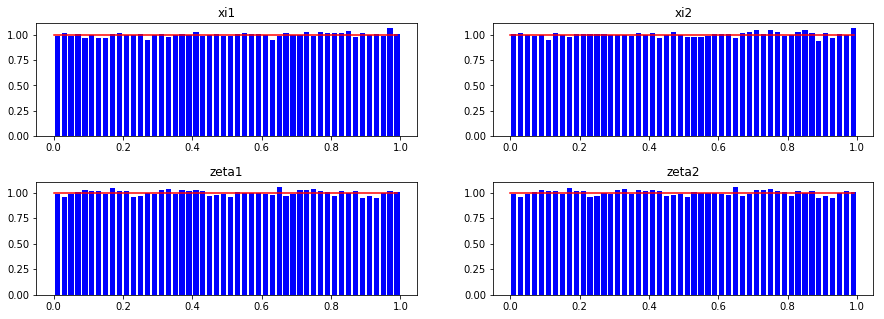

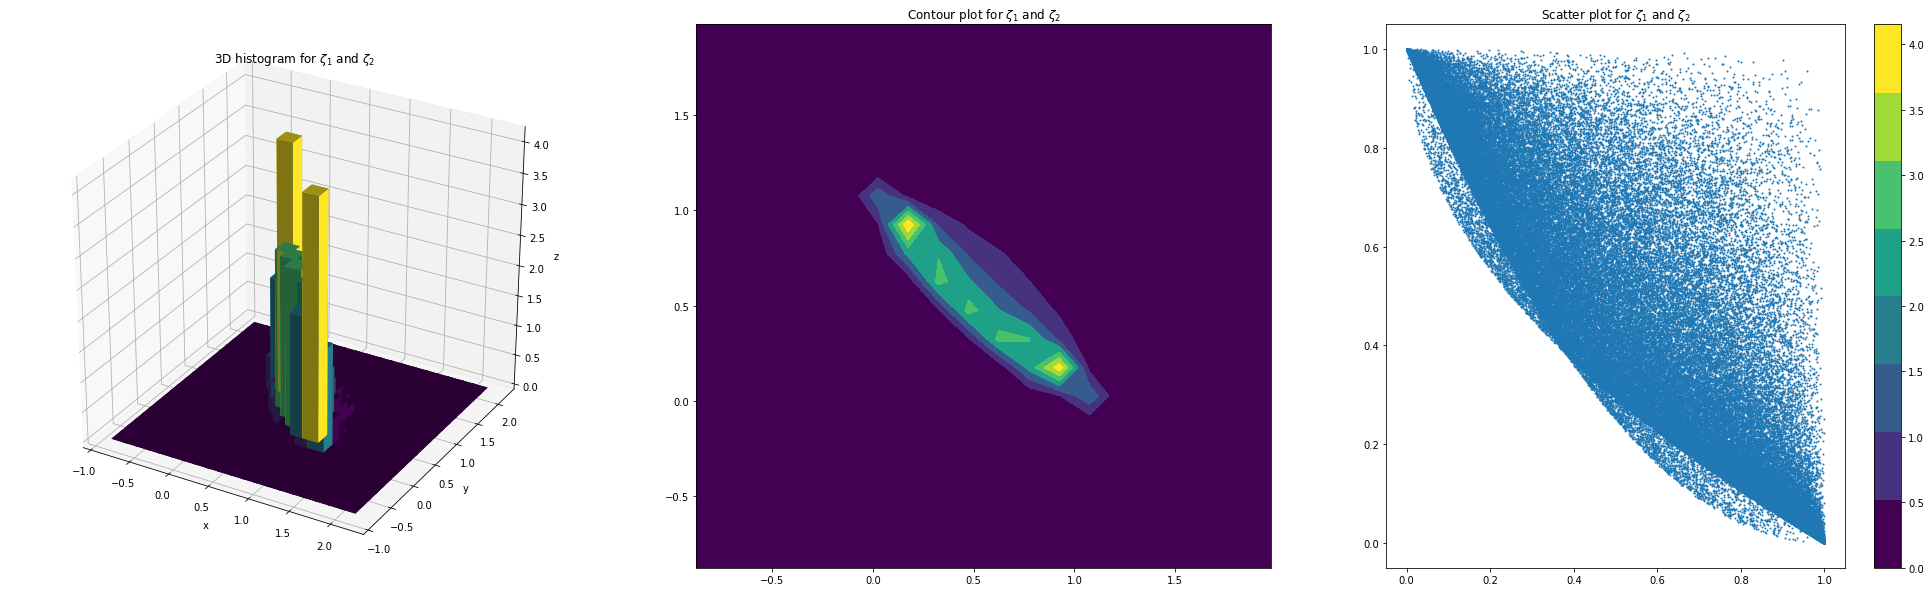

theoretical correlation: -0.8666666666666667
covariation:
 [[ 0.08313313 -0.07206838]
 [-0.07206838  0.08314448]]
Pearson's correlation coefficient: -0.8668440661355145
Stearmanr correlation coefficient: -0.8668431423714203


In [153]:
zeta1 = 1 - xi1 ** (1 - p) * xi2 ** eta1
zeta2 = 1 - (1 - xi2) ** (1 - p) * (1 - xi1) ** eta2

x = np.arange(0, 1, 0.01)

xi1 = uniform.rvs(size=n)
xi2 = uniform.rvs(size=n)

fig = plt.figure(figsize=(20,5))
fig.set_size_inches(15, 5)
plt.subplots_adjust(hspace=0.4)

plt.subplot(2, 2, 1)
plt.hist(xi1, density=True, color='b', rwidth=0.75, bins=50)
plt.plot(x, uniform.pdf(x), 'r')
plt.title('xi1')

plt.subplot(2, 2, 2)
plt.hist(xi2, density=True, color='b', rwidth=0.75, bins=50)
plt.plot(x, uniform.pdf(x), 'r')
plt.title('xi2')

plt.subplot(2, 2, 3)
plt.hist(zeta1, density=True, color='b', rwidth=0.75, bins=50)
plt.plot(x, uniform.pdf(x), 'r')
plt.title('zeta1')

plt.subplot(2, 2, 4)
plt.hist(zeta1, density=True, color='b', rwidth=0.75, bins=50)
plt.plot(x, uniform.pdf(x), 'r')
plt.title('zeta2')

plt.show()


bar3d(zeta1, zeta2, [-1, 2], [-1, 2], 20, '$\zeta_1$ and $\zeta_2$')


if p >= 0.5:
    cor = (-3*(1 - p)*(4 + 5*(1 - p) + 6*(1 - p)**2 + (1 - p)**3)) / ((2 - p)**2 * (3 - p)**2)
else:
    cor = (-3*p*(2 + 3*(1 - p) - (1 - p)**2)) / ((2 - p)**2 *(3 - p))
print("theoretical correlation:", cor)
print("covariation:\n", np.cov(zeta1, zeta2))

print("Pearson's correlation coefficient:", pearsonr(zeta1, zeta2)[0])
print("Stearmanr correlation coefficient:", spearmanr(zeta1, zeta2)[0])